In [1]:
install.packages("igraph")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [38]:
data <- read.csv("socialnetworkdata.csv", header=T)
head(data)

,first,second,grade,spec
,<fct>,<fct>,<int>,<fct>
1,AA,DD,6,Y
2,AB,DD,6,R
3,AF,BA,6,Q
4,DD,DA,6,Q
5,CD,EC,6,X
6,DD,CE,6,Y


In [39]:
y <- data.frame(data$first, data$second)
head(y)

,data.first,data.second
,<fct>,<fct>
1,AA,DD
2,AB,DD
3,AF,BA
4,DD,DA
5,CD,EC
6,DD,CE


In [40]:
net <- graph.data.frame(y, directed=T)
print(net)

IGRAPH 2ab0e25 DN-- 52 290 -- 
+ attr: name (v/c)
+ edges from 2ab0e25 (vertex names):
 [1] AA->DD AB->DD AF->BA DD->DA CD->EC DD->CE CD->FA CD->CC BA->AF CB->CA
[11] CC->CA CD->CA BC->CA DD->DA ED->AD AE->AC AB->BA CD->EC CA->CC EB->CC
[21] BF->CE BB->CD AC->AE CC->FB DC->BB BD->CF DB->DA DD->DA DB->DD BC->AF
[31] CF->DE DF->BF CB->CA BE->CA EA->CA CB->CA CB->CA CC->CA CD->CA BC->CA
[41] BF->CA CE->CA AC->AD BD->BE AE->DF CB->DF AC->DF AA->DD AA->DD AA->DD
[51] CD->DD AA->DD EE->DD CD->DD DB->AA AA->FC BE->CC EF->FD CF->FE BB->DD
[61] CD->DD BA->AB CD->EC BE->EE CE->CC CD->CC ED->CC BB->CC BE->CE DD->CE
[71] AC->CD ED->CD FF->CD AC->CD DD->CD DD->CD AE->GA AE->GA AE->GA AE->GA
+ ... omitted several edges


In [8]:
#We got 52 vertices and 290 edges. Let’s assign the labels.
V(net)$label <- V(net)$name
V(net)$degree <- degree(net)

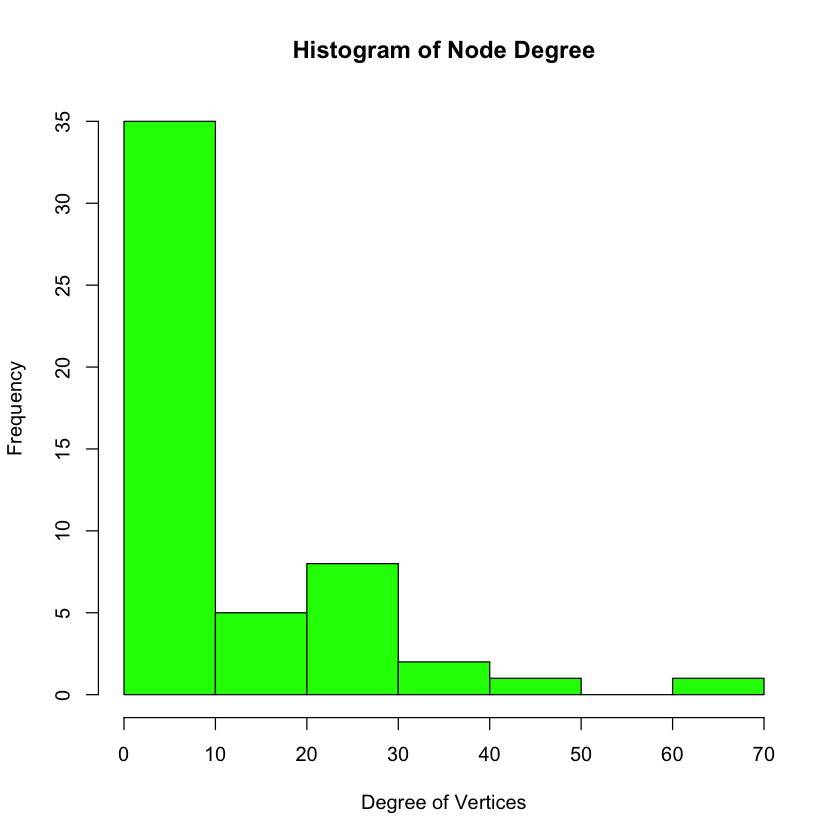

In [9]:
# Histogram of node degree
hist(V(net)$degree,
     col = 'green',
     main = 'Histogram of Node Degree',
     ylab = 'Frequency',
     xlab = 'Degree of Vertices')

# Around 35 nodes with less than 10 degree and some nodes with high degree (60 to 70 connections) also.

# It indicates that many nodes with few connections and few nodes with many connections.

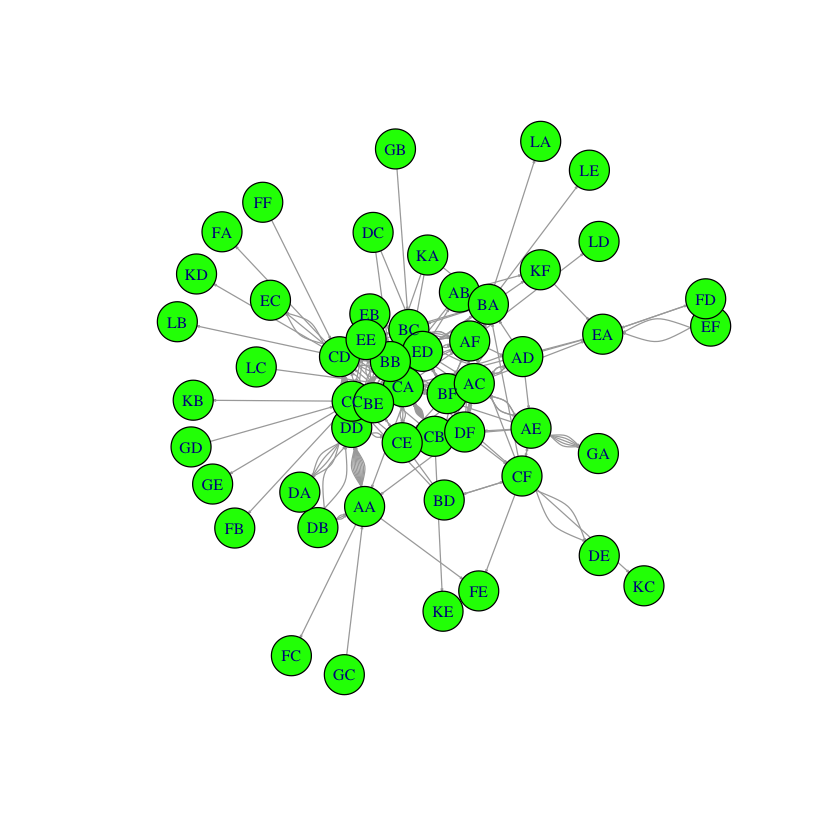

In [67]:
# Network diagram
set.seed(222) # seed is to place the nodes randomly 
plot(net,
     vertex.color = 'green',
     vertext.size = 2,
     edge.arrow.size = 0.1, # size of the arrow on the edge 
     vertex.label.cex = 0.8) # label font size

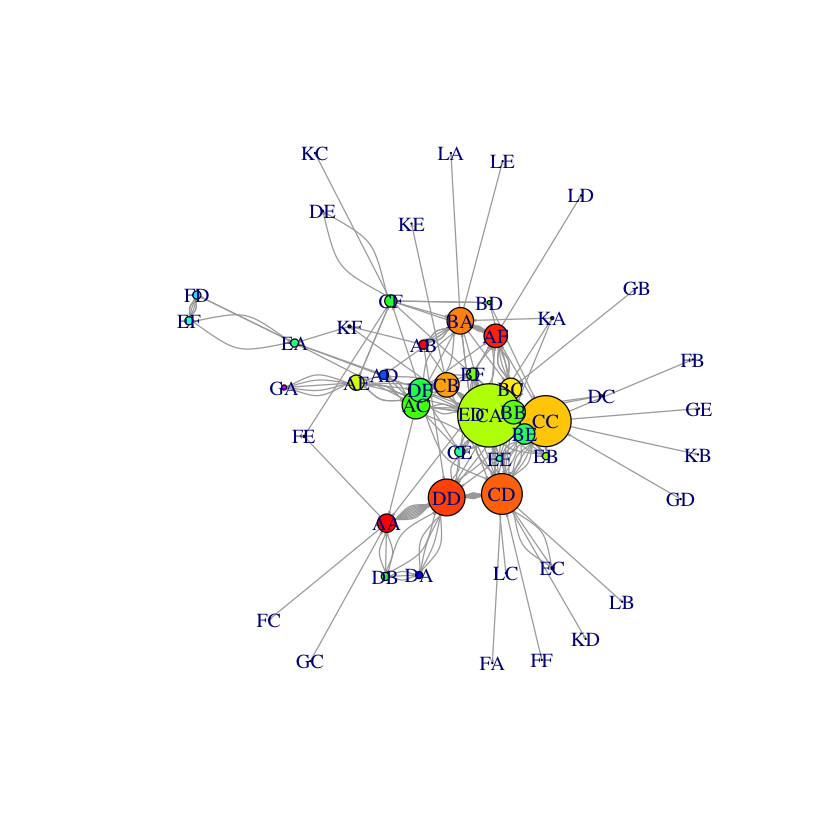

In [11]:
# Highlighting degrees & layouts
plot(net,
     vertex.color = rainbow(52),
     vertex.size = V(net)$degree*0.4,
     edge.arrow.size = 0.1,
     layout=layout.fruchterman.reingold)
# CA has the highest degree followed by others.

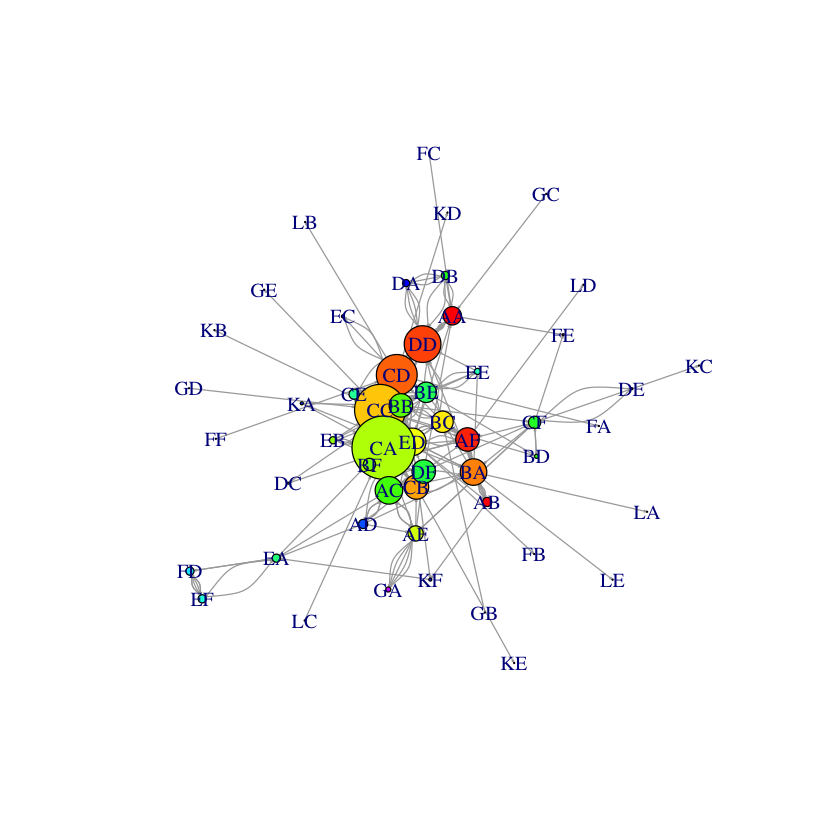

In [12]:
plot(net,
     vertex.color = rainbow(52),
     vertex.size = V(net)$degree*0.4,
     edge.arrow.size = 0.1,
     layout=layout.graphopt)

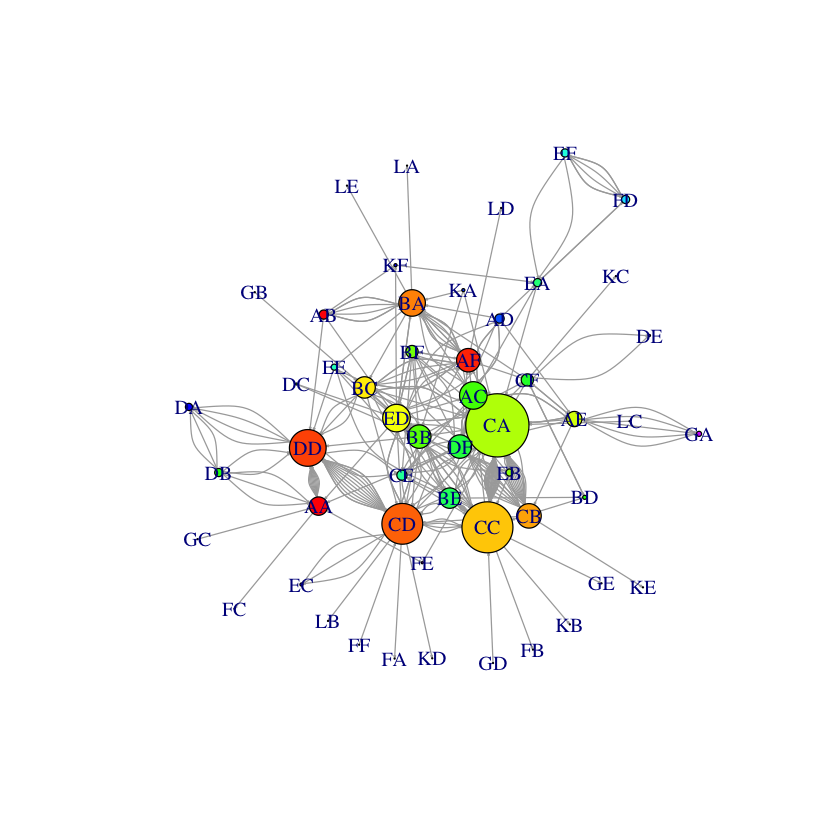

In [13]:
plot(net,
     vertex.color = rainbow(52),
     vertex.size = V(net)$degree*0.4,
     edge.arrow.size = 0.1,
     layout=layout.kamada.kawai)

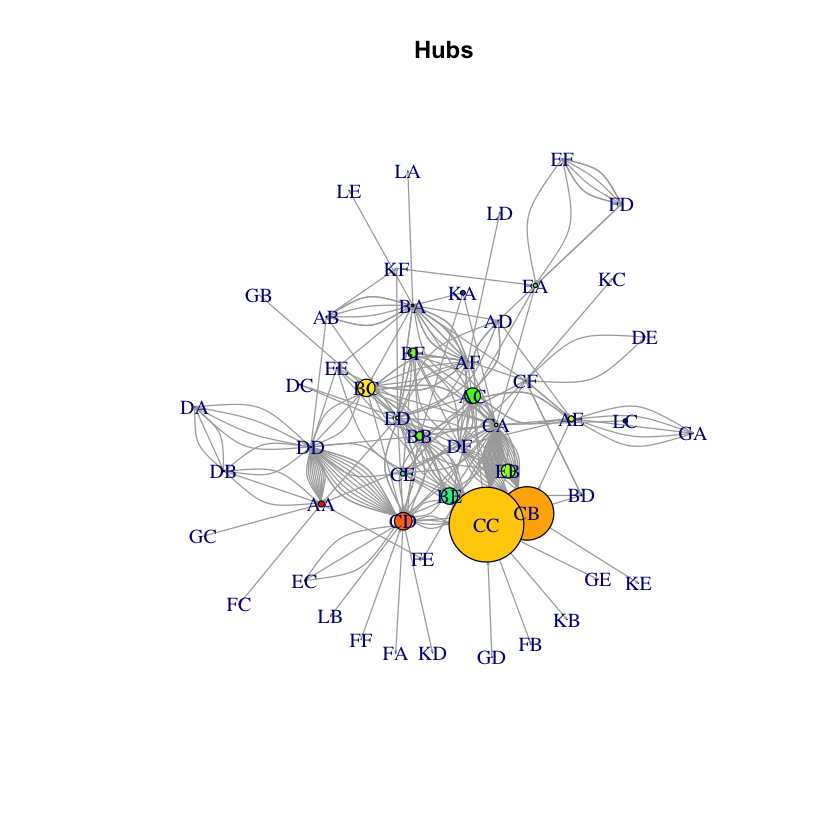

In [14]:
# Hub and Authorities
# Hub has many outgoing links, and Authorities have many incoming links.
hs <- hub_score(net)$vector
as <- authority.score(net)$vector
set.seed(123)
plot(net,
     vertex.size=hs*30,
     main = 'Hubs',
     vertex.color = rainbow(52),
     edge.arrow.size=0.1,
     layout = layout.kamada.kawai)

# You can see the highest outgoing links from CC and CB.

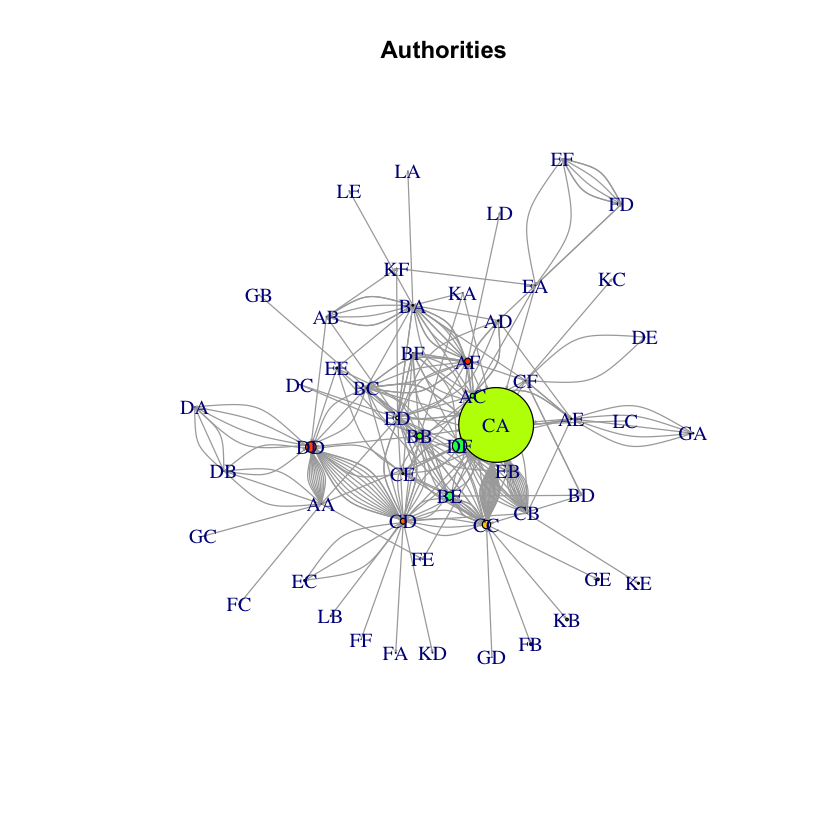

In [15]:
# Authorities
set.seed(123)
plot(net,
     vertex.size=as*30,
     main = 'Authorities',
     vertex.color = rainbow(52),
     edge.arrow.size=0.1,
     layout = layout.kamada.kawai)

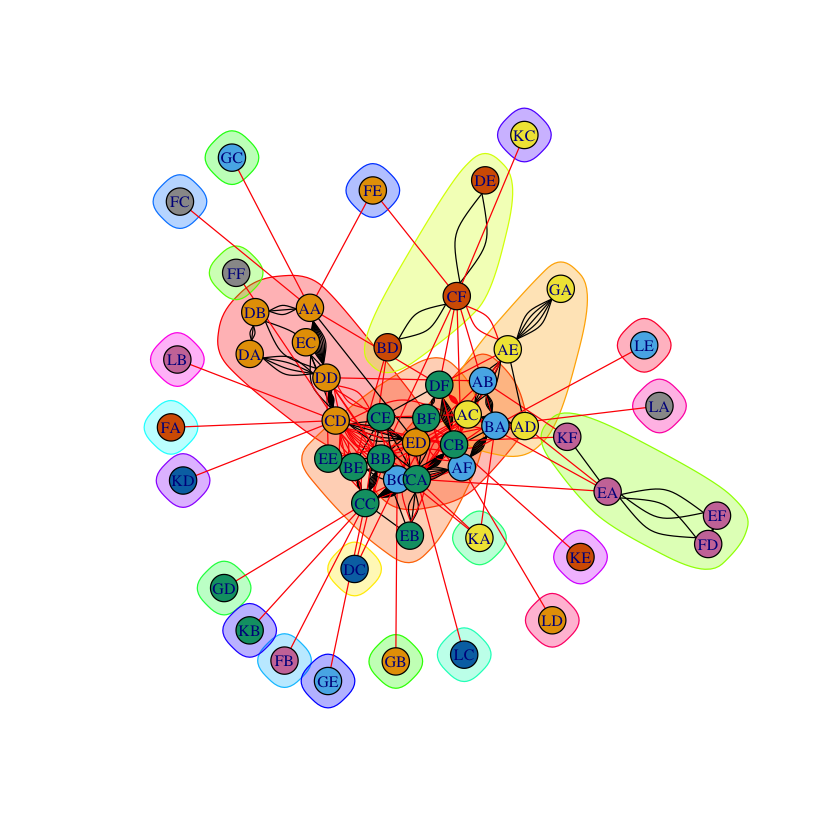

In [16]:
# Community Detection
# To detect densely connected nodes
net <- graph.data.frame(y, directed = F)
cnet <- cluster_edge_betweenness(net)
plot(cnet,
     net,
     vertex.size = 10,
     vertex.label.cex = 0.8)

In [52]:
# Cluster Analysis in R
mydata <- read.csv("ClusterData.csv", header=T)

In [48]:
head(mydata)

,Company,Fixed_charge,RoR,Cost,Load,D.Demand,Sales,Nuclear,Fuel_Cost
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
2,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
3,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
4,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
5,Con Ed NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
6,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241


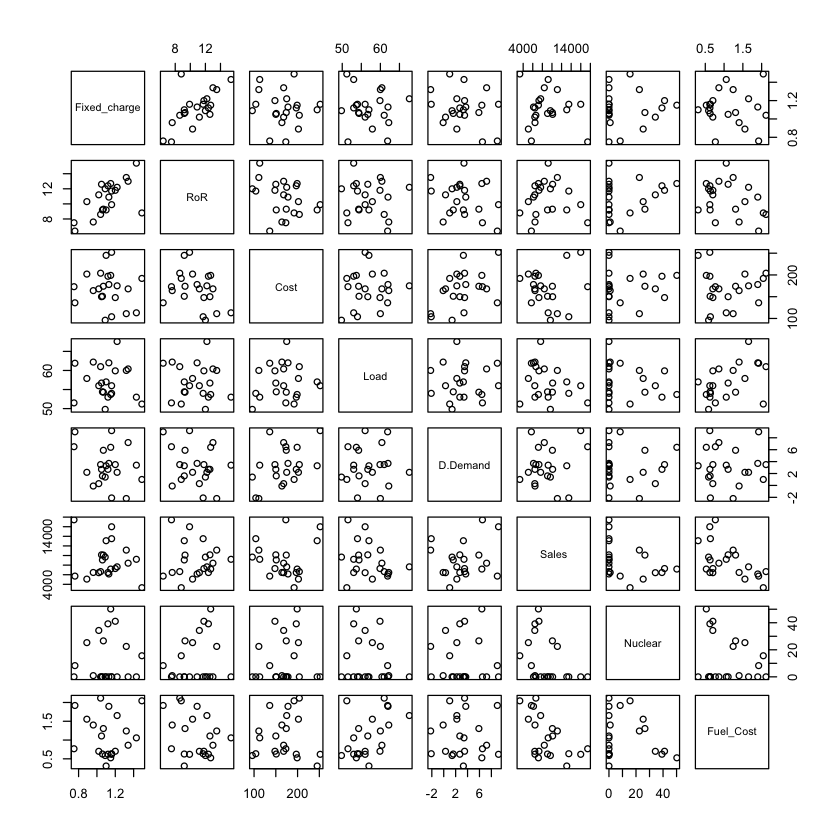

In [20]:
# a pairs plot will provide a scatter plot for all possible combinations
pairs(mydata[2:9])

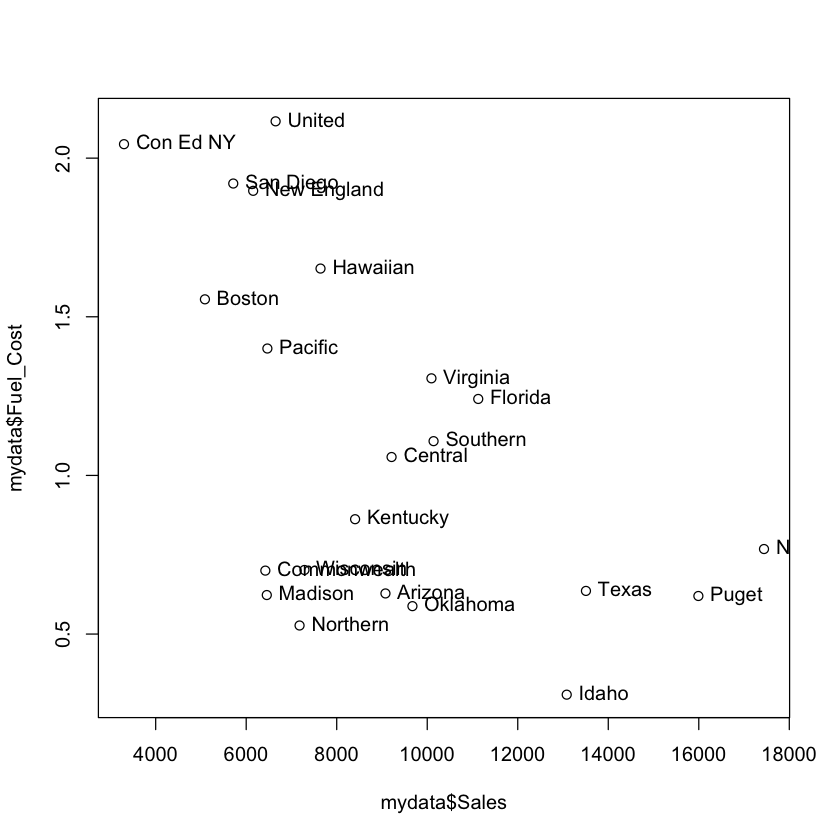

In [79]:
# Scatter plot
plot(mydata$Fuel_Cost ~ mydata$Sales, data = mydata)
 with(mydata, text(mydata$Fuel_Cost ~ mydata$Sales, labels=mydata$Company, pos=4))

In [22]:
# Normalization is very important in cluster analysis, sometimes we have variables 
# in different scales, need to normalized based on scale function before clustering the data sets.

In [65]:
z <- mydata[, -c(1, 1)]
means <- apply(z, 2, mean)
sds <- apply(z, 2, sd)
nor <- scale(z, center=means, scale=sds)

In [24]:
# Calculate distance matrix 
distance = dist(nor)

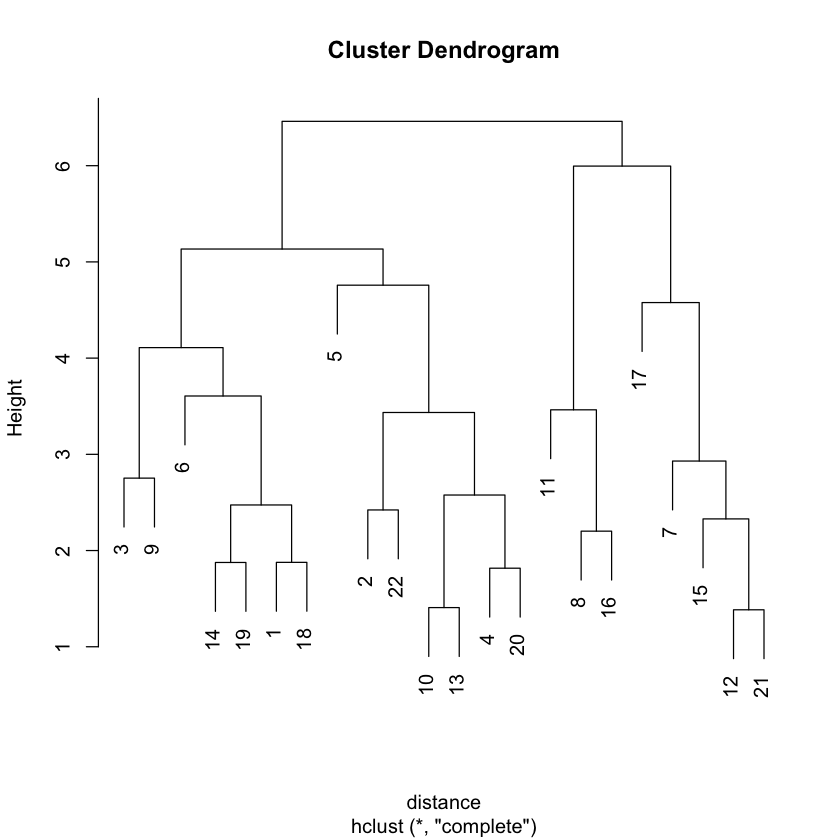

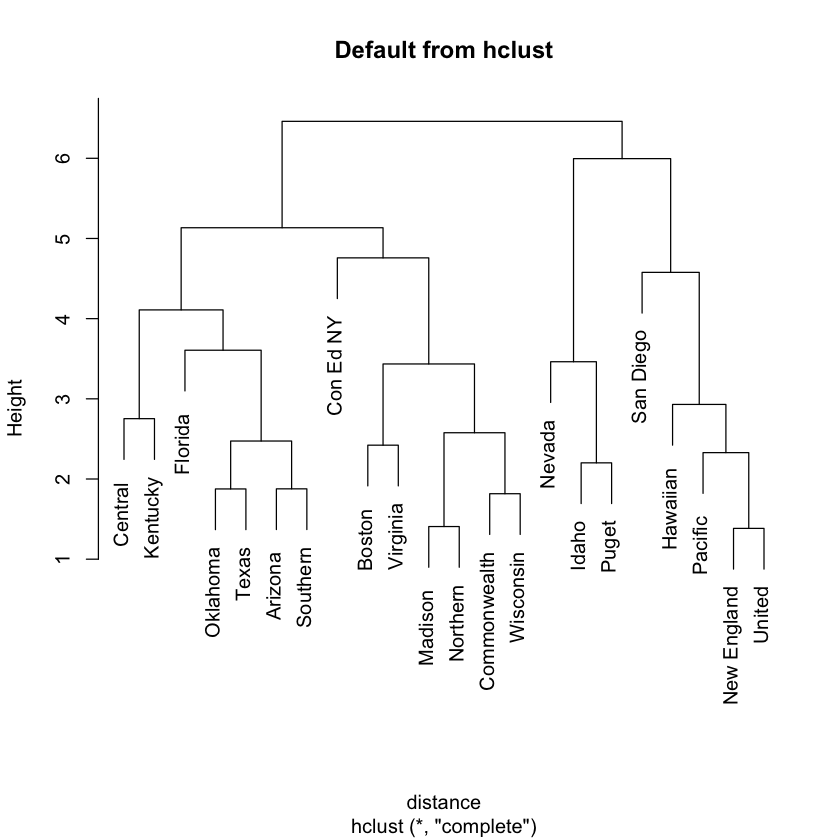

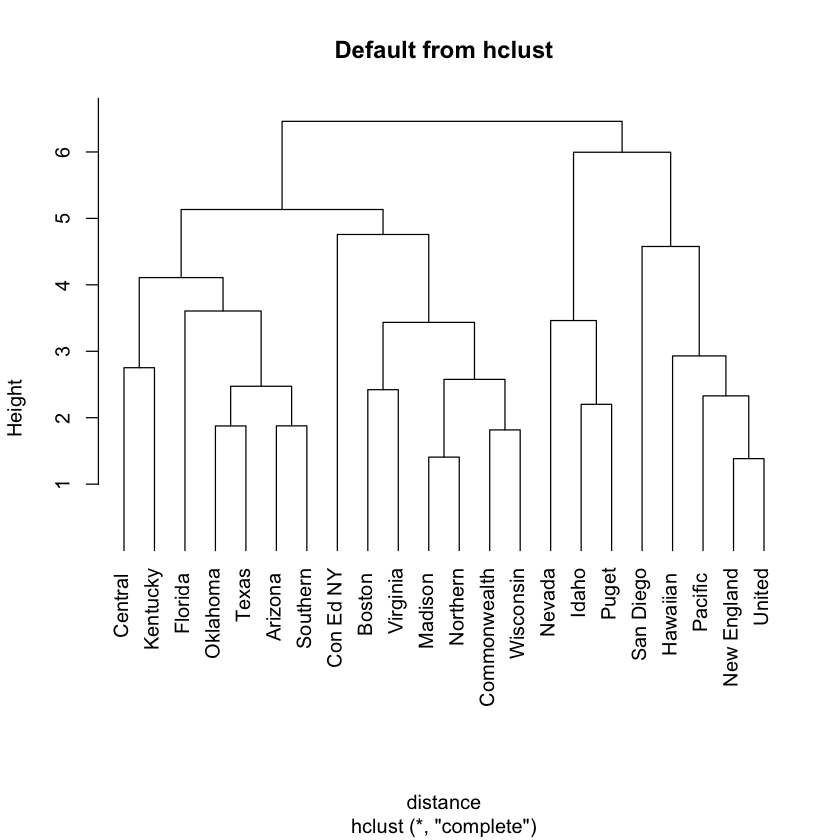

In [66]:
# Hierarchical agglomerative clustering 
mydata.hclust = hclust(distance)
plot(mydata.hclust)
plot(mydata.hclust, labels=mydata$Company, main='Default from hclust')
plot(mydata.hclust, hang=-1, labels=mydata$Company, main='Default from hclust')


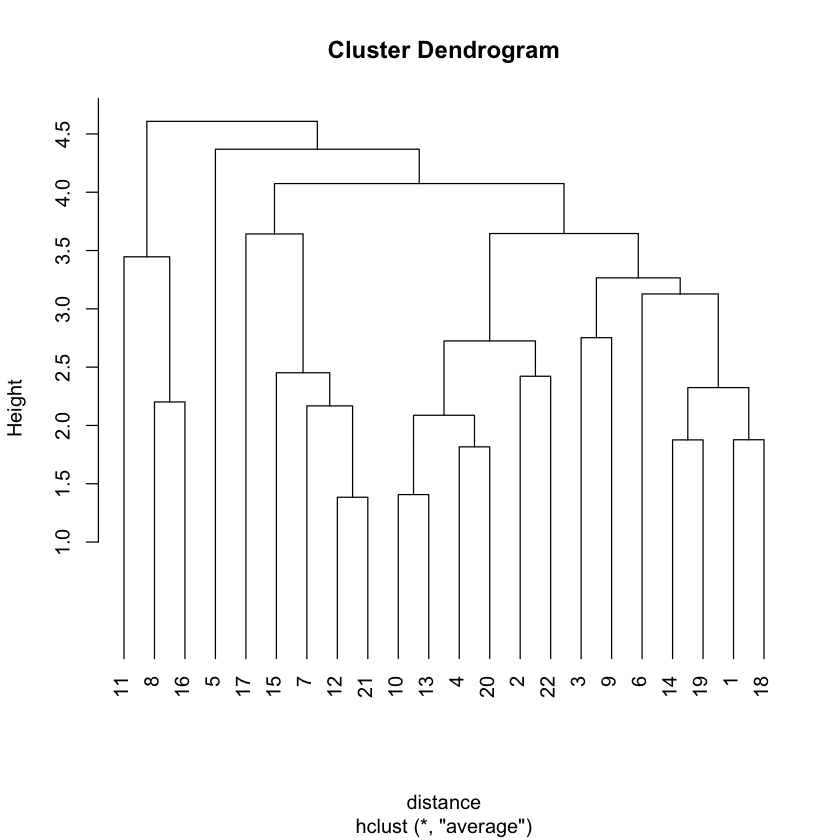

In [26]:
# Hierarchical agglomerative clustering using “average” linkage
mydata.hclust<-hclust(distance,method="average") 
plot(mydata.hclust, hang=-1) 

In [27]:
# Cluster membership
member = cutree(mydata.hclust,3)
table(member)

member
 1  2  3 
18  1  3 

In [28]:
# Characterizing clusters
aggregate(nor,list(member),mean)
aggregate(mydata[,-c(1,1)],list(member),mean)

Group.1,Fixed_charge,RoR,Cost,Load,D.Demand,Sales,Nuclear,Fuel_Cost
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.01313873,0.1868016,-0.2552757,0.1520422,-0.1253617,-0.2215631,0.1071944,0.06692555
2,2.03732429,-0.8628882,0.5782326,-1.2950193,-0.7186431,-1.5814284,0.2143888,1.69263800
3,-0.60027572,-0.8331800,1.3389101,-0.4805802,0.9917178,1.8565214,-0.7146294,-0.96576599


Group.1,Fixed_charge,RoR,Cost,Load,D.Demand,Sales,Nuclear,Fuel_Cost
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.111667,11.155556,157.6667,57.65556,2.850000,8127.50,13.8,1.1399444
2,1.490000,8.800000,192.0000,51.20000,1.000000,3300.00,15.6,2.0440000
3,1.003333,8.866667,223.3333,54.83333,6.333333,15504.67,0.0,0.5656667


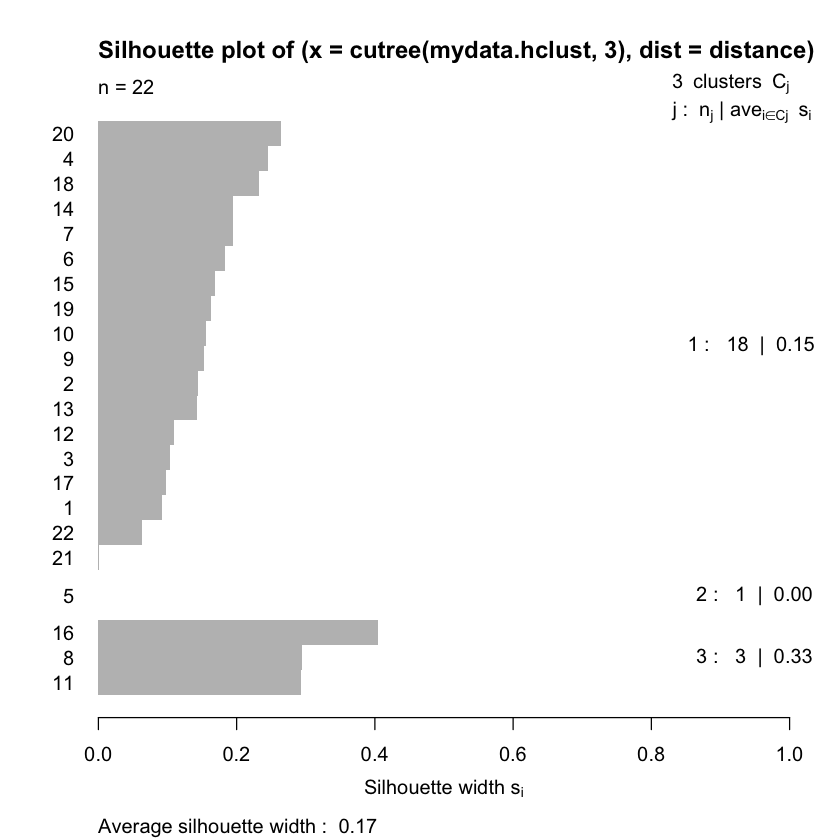

In [29]:
# Silhouette Plot
library(cluster)
plot(silhouette(cutree(mydata.hclust,3), distance))

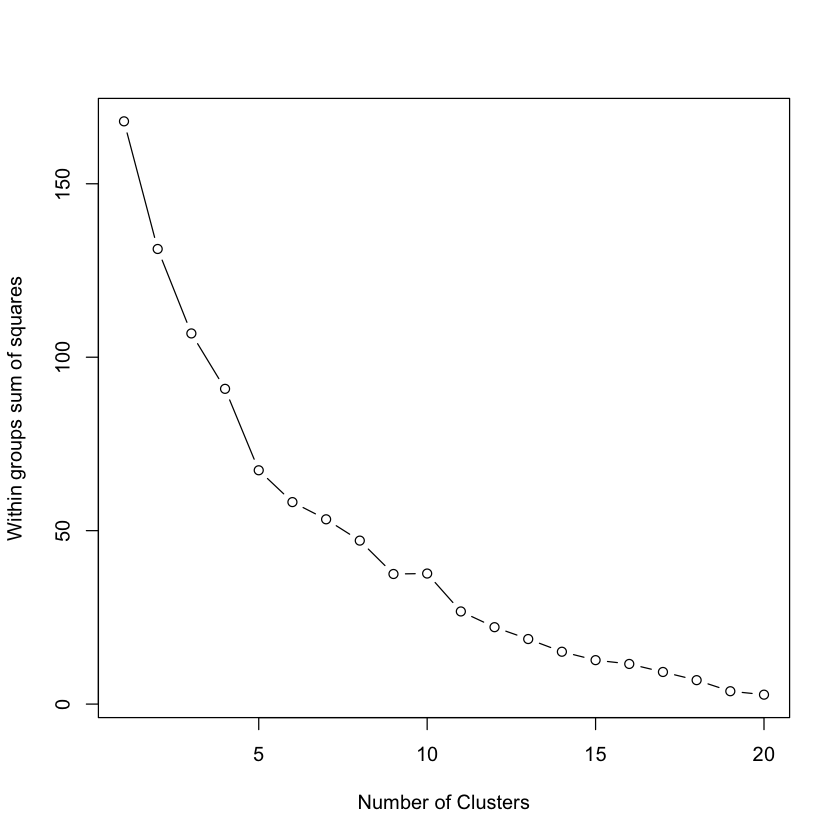

In [30]:
# Scree Plot
# Scree plot will allow us to see the variabilities in clusters, 
# suppose if we increase the number of clusters within-group sum of squares will come down.
wss <- (nrow(nor)-1)*sum(apply(nor,2,var))
for (i in 2:20) wss[i] <- sum(kmeans(nor, centers=i)$withinss)
plot(1:20, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")

# So in this data ideal number of clusters should be 3, 4, or 5.

In [31]:
# K-means clustering
set.seed(123)
kc<-kmeans(nor, 3)
kc

K-means clustering with 3 clusters of sizes 7, 5, 10

Cluster means:
  Fixed_charge         RoR       Cost       Load    D.Demand      Sales
1  -0.23896065 -0.65917479  0.2556961  0.7992527 -0.05435116 -0.8604593
2   0.51980100  1.02655333 -1.2959473 -0.5104679 -0.83409247  0.5120458
3  -0.09262805 -0.05185431  0.4689864 -0.3042429  0.45509205  0.3462986
     Nuclear  Fuel_Cost
1 -0.2884040  1.2497562
2 -0.4466434 -0.3174391
3  0.4252045 -0.7161098

Clustering vector:
 [1] 3 1 2 3 1 2 1 3 3 3 3 1 3 2 1 3 1 2 2 3 1 3

Within cluster sum of squares by cluster:
[1] 34.16481 15.15613 57.53424
 (between_SS / total_SS =  36.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

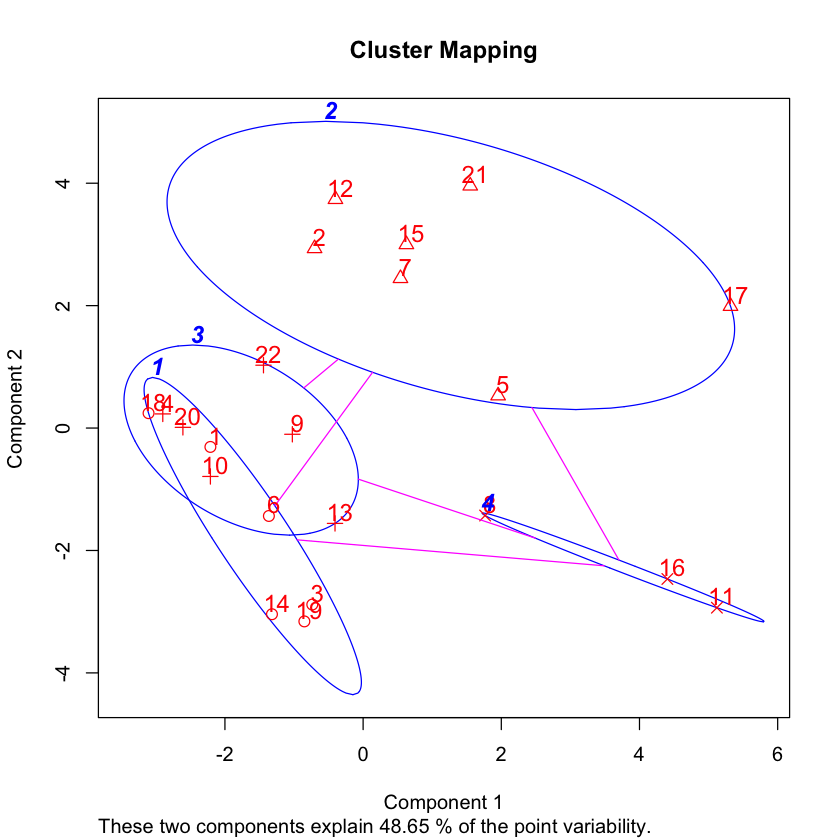

In [32]:
ot<-nor
datadistshortset <- dist(ot, method = "euclidean")
hc1 <- hclust(datadistshortset, method = "complete" )
pamvshortset <- pam(datadistshortset, 4, diss = FALSE)
clusplot(pamvshortset, shade = FALSE,labels=2,col.clus="blue",col.p="red",span=FALSE,main="Cluster Mapping",cex=1.2)

Spatial Social Networks (SSN) Visualization and Metrics with R
https://friendlycities-gatech.github.io/SSN_tutorial/

Stanford Large Network Dataset Collection
https://snap.stanford.edu/data/index.html

National Science Foundation - Research Experiences for Undergraduates (REU)
https://www.nsf.gov/crssprgm/reu/reu_search.jsp
